In [2]:
import os
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier


In [3]:
df = pd.read_csv(r"C:\Users\marah salahat\Desktop\Data Science\spam.csv", encoding="ISO-8859-1")
df.describe()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    return text

df['v2'] = df['v2'].apply(preprocess_text)


In [6]:
label_mapping = {'ham': 0, 'spam': 1}
df['v1'] = df['v1'].map(label_mapping)


In [7]:
X = df['v2']
y = df['v1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Text Vectorization using TF-IDF : turn the text into numerical data so it can be used by the model.

In [8]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


Model Training

In [9]:

from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

model.fit(X_train_tfidf, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

Model Evaluation

In [27]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test_tfidf)
ccuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9766816143497757
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



Visualization

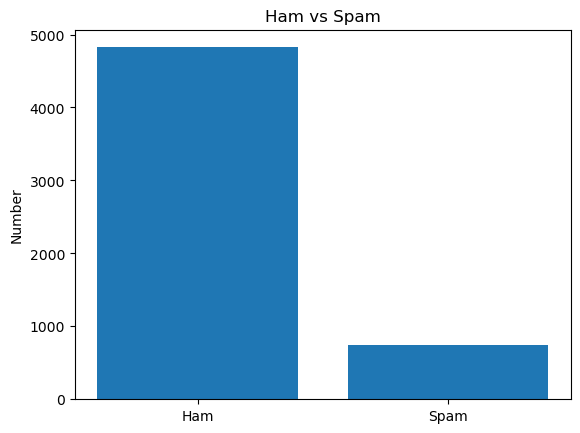

In [14]:
import matplotlib.pyplot as plt


ham_count = df[df['v1'] == 0].shape[0]
spam_count = df[df['v1'] == 1].shape[0]

plt.bar(['Ham', 'Spam'], [ham_count, spam_count])
plt.ylabel('Number')
plt.title('Ham vs Spam')
plt.show()


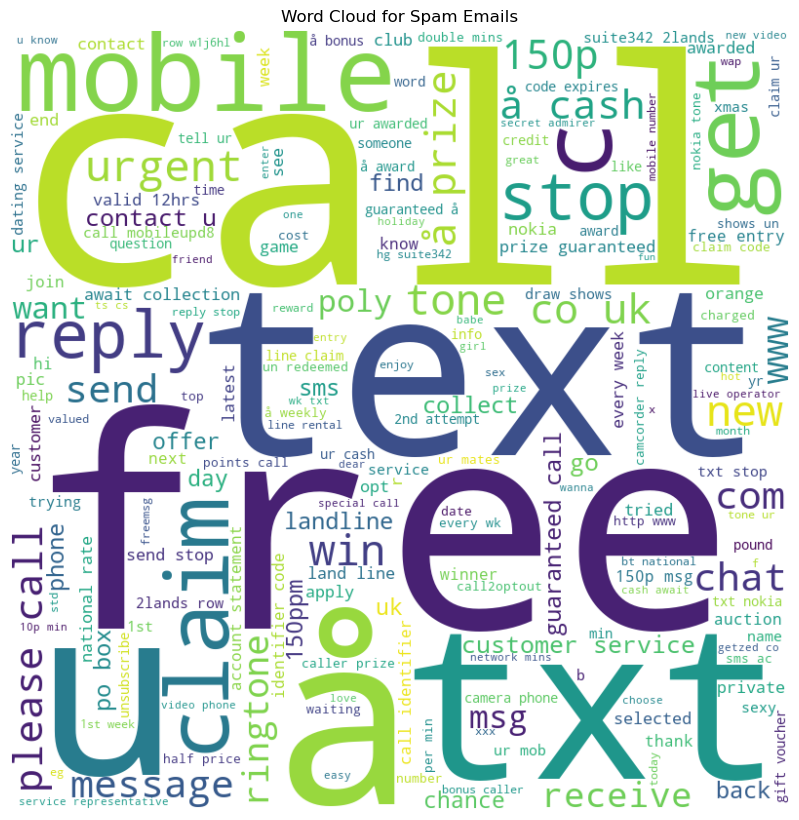

In [25]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

spam_text = ' '.join(df[df['v1'] == 1]['v2'])

# Generate a word cloud
stop_words = set(stopwords.words('english'))
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stop_words).generate(spam_text)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Emails')
plt.tight_layout(pad=0)
plt.show()


In [3]:

import tensorflow as tf

In [2]:
pip install tensorflow



                                              0.0/276.6 MB ? eta -:--:--
                                              0.0/276.6 MB 1.4 MB/s eta 0:03:23
                                            0.1/276.6 MB 787.7 kB/s eta 0:05:52
                                              0.2/276.6 MB 1.1 MB/s eta 0:04:02
                                              0.3/276.6 MB 1.5 MB/s eta 0:02:59
                                              0.4/276.6 MB 1.6 MB/s eta 0:02:54
                                              0.5/276.6 MB 1.8 MB/s eta 0:02:36
                                              0.5/276.6 MB 1.7 MB/s eta 0:02:45
                                              0.7/276.6 MB 1.9 MB/s eta 0:02:23
                                              0.8/276.6 MB 2.1 MB/s eta 0:02:14
                                              0.9/276.6 MB 2.1 MB/s eta 0:02:11
                                              1.1/276.6 MB 2.1 MB/s eta 0:02:11
                                              